One important part of machine learning today is recommender systems. These are systems that suggest products, services, or content to users, based on their interests. Many big companies use recommender systems to increase their sales and keep users active.

For example:

1. Amazon makes 35% of its sales from its recommendation engine.

2. Netflix says that 75% of the shows people watch come from its recommendations.

3. Spotify reports that 30% of songs played are from recommended playlists.

4. YouTube shows that 70% of the videos watched are from its recommendations.

5. Alibaba uses recommendation systems for 20% of its product sales.

These numbers show how powerful recommendation systems are. They help companies offer the right product to the right customer at the right time.

The good news is that you don’t need to be Amazon or Netflix to build a recommender system. With some basic knowledge, even small businesses can create one.

There are different types of recommender systems:

* Popularity-based systems: They show items that are popular with everyone. For example, “Top trending videos on TikTok this week” or “Most booked homes on Airbnb today.” These systems do not need machine learning.

* Collaborative filtering: They suggest items based on what other users chose. For example, “People who listened to this album on Spotify also listened to these artists” or “Shoppers who bought this jacket on Zalando also bought these shoes.” This method looks at the choices of similar users.

* Content-based systems: These systems are more advanced and use machine learning. They recommend items based on the product’s details or features. For example, “If you watched Frozen 2 on Disney+, you might also like Moana” or “If you booked a beach house on Airbnb, you might like these seaside apartments too.”

1. A way to convert product features into numbers (vectorize them). You can use a Count Vectorizer to count the words in product descriptions.

2. A way to measure similarity between products. A simple method is cosine similarity, which compares two products and tells you how close they are.

Once you understand these two ideas, you can start building your own recommender system to boost your business.

**Converting Text to Numbers: Vectorization Methods**

* CountVectorizer

Builds a vocabulary dictionary from the text corpus and creates a matrix of word counts.

* HashingVectorizer

Uses hashing functions instead of storing a vocabulary in memory, making it more memory-efficient while producing word count vectors.

* TfidfVectorizer

Builds a vocabulary and produces a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) scores, which reflect the importance of words relative to the corpus.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# Sample documents
documents = [
    "I love data science and machine learning",
    "Machine learning models need vectorized input",
    "Data science is fun and powerful"
]


In [8]:
# 1. CountVectorizer example
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(documents)
print("CountVectorizer matrix:\n", count_matrix.toarray())
print("Feature names:", count_vec.get_feature_names_out())


CountVectorizer matrix:
 [[1 1 0 0 0 1 1 1 0 0 0 1 0]
 [0 0 0 1 0 1 0 1 1 1 0 0 1]
 [1 1 1 0 1 0 0 0 0 0 1 1 0]]
Feature names: ['and' 'data' 'fun' 'input' 'is' 'learning' 'love' 'machine' 'models'
 'need' 'powerful' 'science' 'vectorized']


In [9]:

# 2. HashingVectorizer example
hash_vec = HashingVectorizer(n_features=10)  # specify number of features (hash buckets)
hash_matrix = hash_vec.transform(documents)
print("HashingVectorizer matrix:\n", hash_matrix.toarray())


HashingVectorizer matrix:
 [[ 0.         -0.5         0.5        -0.5        -0.5         0.
   0.          0.          0.          0.        ]
 [-0.31622777  0.          0.63245553  0.         -0.31622777  0.
   0.63245553  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.70710678
   0.          0.70710678  0.          0.        ]]


In [10]:

# 3. TfidfVectorizer example
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(documents)
print("TfidfVectorizer matrix:\n", tfidf_matrix.toarray())
print("Feature names:", tfidf_vec.get_feature_names_out())

TfidfVectorizer matrix:
 [[0.38550292 0.38550292 0.         0.         0.         0.38550292
  0.50689001 0.38550292 0.         0.         0.         0.38550292
  0.        ]
 [0.         0.         0.         0.44036207 0.         0.3349067
  0.         0.3349067  0.44036207 0.44036207 0.         0.
  0.44036207]
 [0.34949812 0.34949812 0.45954803 0.         0.45954803 0.
  0.         0.         0.         0.         0.45954803 0.34949812
  0.        ]]
Feature names: ['and' 'data' 'fun' 'input' 'is' 'learning' 'love' 'machine' 'models'
 'need' 'powerful' 'science' 'vectorized']


As for which technique is preferable or considered the best, that will be the subject of another article. For now, after converting text into numerical representations, we will see how to compute their similarity.

**Cosine Similarity**


Cosine similarity is a technique used to measure how similar two vectors are—that is, how closely two sets of numbers align in space. The core idea is to take each numerical feature in a data sample—like the frequency of certain words in a document—and treat them as coordinates that form a vector starting from the origin (0,0,…). You repeat this for another sample, and then you compute the cosine of the angle between these vectors in an m-dimensional space, where m represents the number of features.

If two vectors are identical, they will point in exactly the same direction, making the angle between them zero. In this case, the cosine similarity equals 1, meaning they are perfectly similar. As the vectors differ more, the angle increases, and the cosine similarity decreases towards 0.

Let’s take a simple example in 2D space to visualize this. Imagine you have three data entries, each represented by two numbers:

| Row   | Value 1 | Value 2 |
| ----- | ------- | ------- |
| Row 1 | 2       | 4       |
| Row 2 | 4      | 7       |
| Row 3 | 6       | 2       |




Now, you want to find out whether Row 2 is more similar to Row 1 or Row 3. At first glance, it’s not obvious just by looking at the numbers. For instance, if you just added up the numbers in each row:

Row 1 sum = 6

Row 2 sum = 11

Row 3 sum = 8

You might mistakenly think Row 2 is closer to Row 3 because 11 and 8 are near each other. However, this ignores the direction of the vectors.

If we visualize these rows as vectors starting at (0,0):

Row 1: (0, 0) → (2, 4)

Row 2: (0, 0) → (3, 6)

Row 3: (0, 0) → (6, 2)





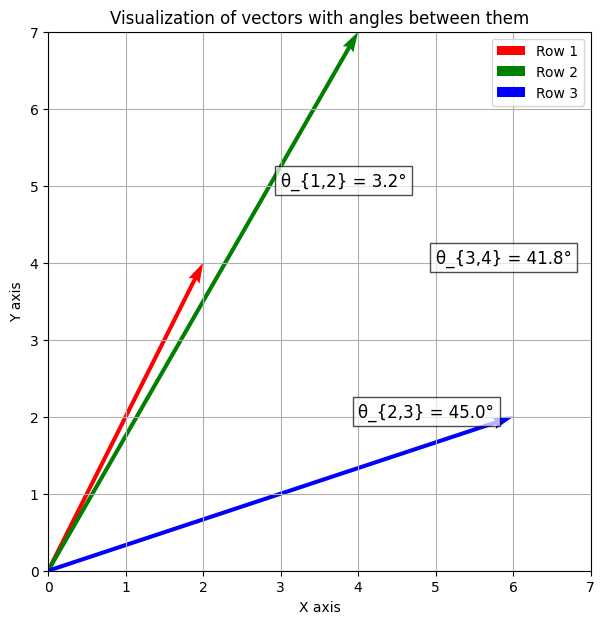

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Vecteurs définis
vectors = {
    "Row 1": np.array([2, 4]),
    "Row 2": np.array([4, 7]),
    "Row 3": np.array([6, 2])
}

colors = {
    "Row 1": 'r',
    "Row 2": 'g',
    "Row 3": 'b'
}

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def angle_between(v1, v2):
    cos_sim = cosine_similarity(v1, v2)
    cos_sim = np.clip(cos_sim, -1, 1)
    angle_rad = np.arccos(cos_sim)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

plt.figure(figsize=(7,7))
ax = plt.gca()

# Tracer les vecteurs
for label, vec in vectors.items():
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[label], label=label)

# Limites du graphique
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Visualization of vectors with angles between them')
plt.grid(True)

# Calcul et annotation des angles entre chaque paire avec notation θ_i,j
pairs = [("Row 1", "Row 2"), ("Row 1", "Row 3"), ("Row 2", "Row 3")]
positions = [(3,5), (4,2), (5,4)]  # positions pour afficher les textes des angles

for (i, (v1_label, v2_label)) in enumerate(pairs):
    angle = angle_between(vectors[v1_label], vectors[v2_label])
    x, y = positions[i]
    # Affichage avec indices en bas pour i,j
    ax.text(x, y, f'θ_{{{i+1},{i+2}}} = {angle:.1f}°', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.show()


You can now visualize each row as a vector, calculate the cosine of the angles formed between vectors 1 and 2, as well as between vectors 2 and 3, and conclude that row 2 is more similar to row 1 than to row 3. This is essentially how cosine similarity works.

Cosine similarity is not limited to two dimensions—it also applies to higher-dimensional spaces. To simplify computing cosine similarities regardless of the number of dimensions, Scikit-learn provides the cosine_similarity function.


 Here’s an example that calculates the cosine similarities among the three vectors from the example above:

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

data = [[2, 4], [4, 7], [6, 2]]
similarity_matrix = cosine_similarity(data)
print(similarity_matrix)


[[1.         0.99846035 0.70710678]
 [0.99846035 1.         0.74524131]
 [0.70710678 0.74524131 1.        ]]


The output above is a similarity matrix that shows the cosine values for each pair of vectors. The matrix is square, with both width and height equal to the number of samples.

From this, you can see the similarity between row 1 and row 2 is approximately 0.997, indicating they are very close. The similarity between row 2 and row 3 is about 0.812, which is higher than that between row 1 and row 3 (around 0.728). This confirms that row 2 is more similar to row 1 than to row 3.
